In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Char')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_edf import load_alphabet
from __01_transform_data import transform_eeg_data, apply_filter, remove_offset
from __02_model import train, visualize
from __01_transform_data import process_band
from __03_utils import plot_eeg, plot_eeg_1280

In [4]:
X, Y, channels = load_alphabet(fo)

print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')
print(channels)

Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Relevant Channels: ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_C.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_F.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_H.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_

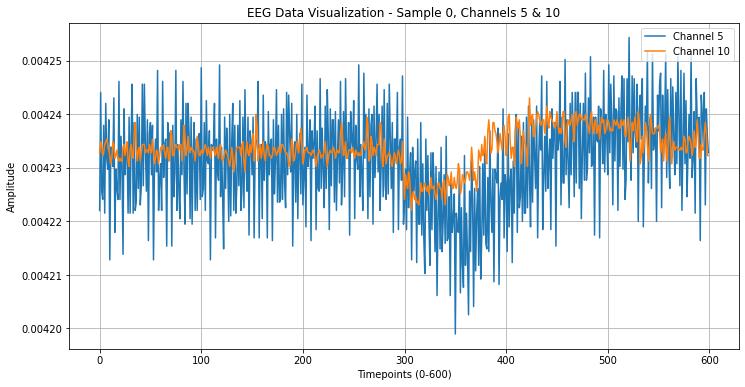

In [5]:
plot_eeg_1280(X, channels=(4, 9), lim=600)

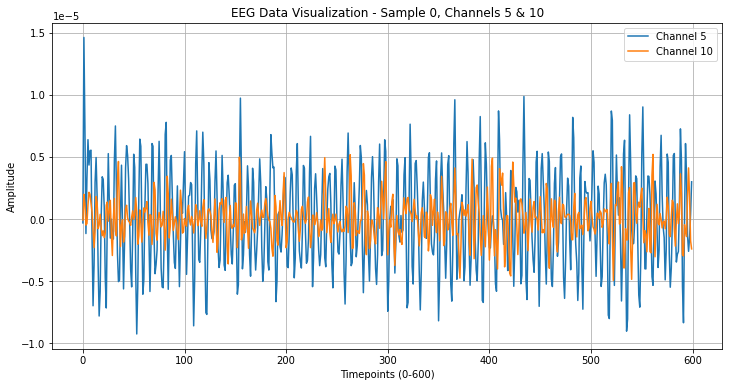

In [6]:
filtered_eeg_data_hp = remove_offset(X, sampling_rate=128)
emotiv_filtered = apply_filter(filtered_eeg_data_hp, 4, 40, 128)
plot_eeg_1280(emotiv_filtered, channels=(4, 9))

In [7]:
selected_channels = [4,9]
dataset_type = 'alphabet'
channels  = 'two_channel'
X_new, Y_new = transform_eeg_data(emotiv_filtered, Y, selected_channels)

print(f'shape of X_new : {X_new.shape}')
print(f'shape of Y_new : {Y_new.shape}')



shape of X_new : (36110, 32, 2)
shape of Y_new : (36110,)


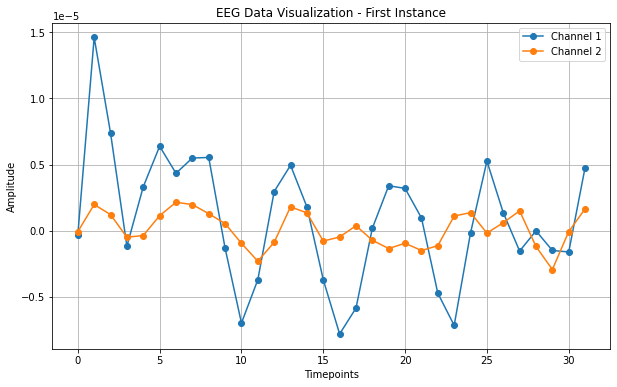

In [8]:
plot_eeg(X_new)

Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1089 - loss: 2.2983
Epoch 1: val_loss improved from inf to 2.31165, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.1089 - loss: 2.2982 - val_accuracy: 0.1000 - val_loss: 2.3117
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1146 - loss: 2.2899
Epoch 2: val_loss improved from 2.31165 to 2.30377, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.1146 - loss: 2.2899 - val_accuracy: 0.1004 - val_loss: 2.3038
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1141 - loss: 2.2868
Epoch 3: val_loss did not improve from 2.30377
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.1141 - loss: 2.2868 - val_accuracy: 0.0999 - val_loss: 5.5109
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1191 - loss: 2.2835
Epoch 4: val_los

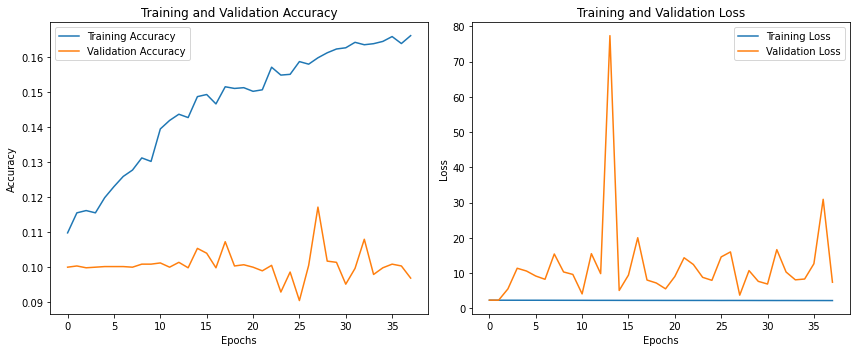

In [9]:
# raw * 1000
X_new, Y_new = transform_eeg_data(X, Y, selected_channels)

model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)

Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1050 - loss: 2.3011
Epoch 1: val_loss improved from inf to 2.30636, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.1050 - loss: 2.3011 - val_accuracy: 0.1000 - val_loss: 2.3064
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1136 - loss: 2.2985
Epoch 2: val_loss did not improve from 2.30636
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.1136 - loss: 2.2985 - val_accuracy: 0.0999 - val_loss: 2.3361
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1203 - loss: 2.2961
Epoch 3: val_loss did not improve from 2.30636
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.1202 - loss: 2.2961 - val_accuracy: 0.1000 - val_loss: 2.6149
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1141 - loss: 2.2941
Epoch 4: val_loss did not improve from 2.30636
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/

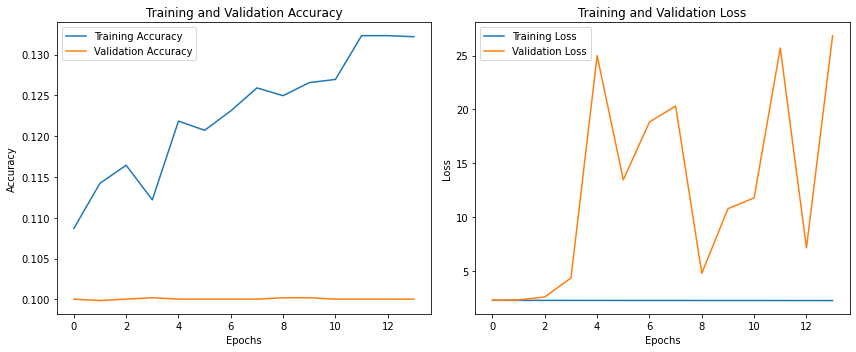

In [10]:
# offset filter
X_new, Y_new = transform_eeg_data(filtered_eeg_data_hp, Y, selected_channels)

model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)

Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0995 - loss: 2.3031
Epoch 1: val_loss improved from inf to 2.68998, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.0995 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.6900
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1051 - loss: 2.3022
Epoch 2: val_loss did not improve from 2.68998
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.1051 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 7.5954
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1017 - loss: 2.3025
Epoch 3: val_loss did not improve from 2.68998
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.1017 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 4.4552
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1090 - loss: 2.2995
Epoch 4: val_loss did not improve from 2.68998
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/

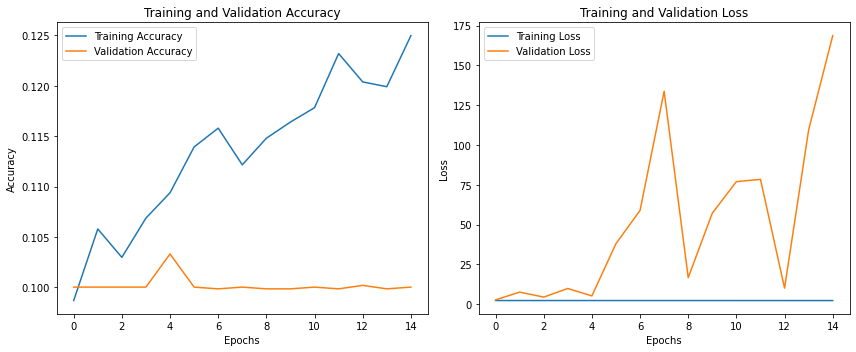

In [11]:
# offset filter -> bandpass 4~40Hz
X_new, Y_new = transform_eeg_data(emotiv_filtered, Y, selected_channels)

model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)

In [12]:
THETA = (4, 7)
ALPHA = (7, 15)
BETA = (15, 31)
GAMMA = (31, None)

Epoch 1/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1092 - loss: 2.3008
Epoch 1: val_loss improved from inf to 2.37774, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.1092 - loss: 2.3008 - val_accuracy: 0.1000 - val_loss: 2.3777
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1182 - loss: 2.2848
Epoch 2: val_loss improved from 2.37774 to 2.35016, saving model to model/two_channel/model_alphabet_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.1183 - loss: 2.2847 - val_accuracy: 0.1000 - val_loss: 2.3502
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1365 - loss: 2.2658
Epoch 3: val_loss did not improve from 2.35016
181/181 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.1365 - loss: 2.2658 - val_accuracy: 0.1000 - val_loss: 6.5772
Epoch 4/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1432 - loss: 2.2389
Epoch 4: val_los

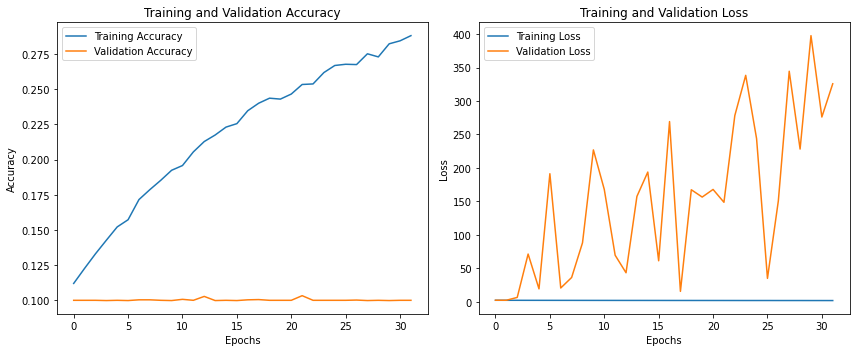

AttributeError: 'tuple' object has no attribute 'input'

In [13]:
X_new, Y_new = process_band(emotiv_filtered, Y, l_freq=BETA[0], h_freq=BETA[1])

model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)
print(model.summary())

In [ ]:
X_new, Y_new = process_band(emotiv_filtered, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])

model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)
print(model.summary())